# Data Exploration

### 1. Importing Packages and Loading Data

In [4]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns

In [5]:
df = pd.read_csv("/Users/matteo/Documents/PersonalProjects/airbnb-pricing-optimization/data/listings-2.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7780 entries, 0 to 7779
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7780 non-null   int64  
 1   listing_url                                   7780 non-null   object 
 2   scrape_id                                     7780 non-null   int64  
 3   last_scraped                                  7780 non-null   object 
 4   source                                        7780 non-null   object 
 5   name                                          7780 non-null   object 
 6   description                                   7688 non-null   object 
 7   neighborhood_overview                         4683 non-null   object 
 8   picture_url                                   7780 non-null   object 
 9   host_id                                       7780 non-null   i

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.780000e+03,7.780000e+03,7.780000e+03,7779.000000,7779.000000,0.0,7780.000000,7780.000000,7780.000000,5846.000000,...,5910.000000,5909.000000,5910.000000,5909.000000,5909.000000,7780.000000,7780.000000,7780.000000,7780.000000,5910.000000
mean,5.423931e+17,2.025090e+13,1.949055e+08,293.905901,389.589279,NaN,37.770925,-122.429149,3.232005,1.322614,...,4.775068,4.884737,4.865125,4.788201,4.673897,23.398201,10.117995,12.272879,0.042931,1.245953
std,5.626811e+17,2.199360e+00,2.162753e+08,1014.788247,1335.978069,NaN,0.023160,0.026895,2.083062,0.737084,...,0.437412,0.316328,0.349049,0.390806,0.453168,55.423629,31.842264,47.920183,0.488676,1.997823
min,9.580000e+02,2.025090e+13,1.169000e+03,1.000000,1.000000,NaN,37.708480,-122.512460,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.826221e+07,2.025090e+13,1.041522e+07,1.000000,2.000000,NaN,37.755847,-122.441104,2.000000,1.000000,...,4.740000,4.900000,4.880000,4.760000,4.620000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,5.743371e+17,2.025090e+13,9.089162e+07,4.000000,6.000000,NaN,37.776829,-122.421594,2.000000,1.000000,...,4.920000,4.980000,4.980000,4.900000,4.780000,3.000000,1.000000,0.000000,0.000000,0.470000
75%,1.074843e+18,2.025090e+13,3.907730e+08,31.000000,41.000000,NaN,37.788415,-122.410430,4.000000,1.500000,...,5.000000,5.000000,5.000000,5.000000,4.910000,15.000000,2.000000,3.000000,0.000000,1.660000
max,1.499678e+18,2.025090e+13,7.160698e+08,5445.000000,9551.000000,NaN,37.810940,-122.366040,16.000000,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,264.000000,188.000000,264.000000,7.000000,49.890000


### 2. Analyzing Missing Data

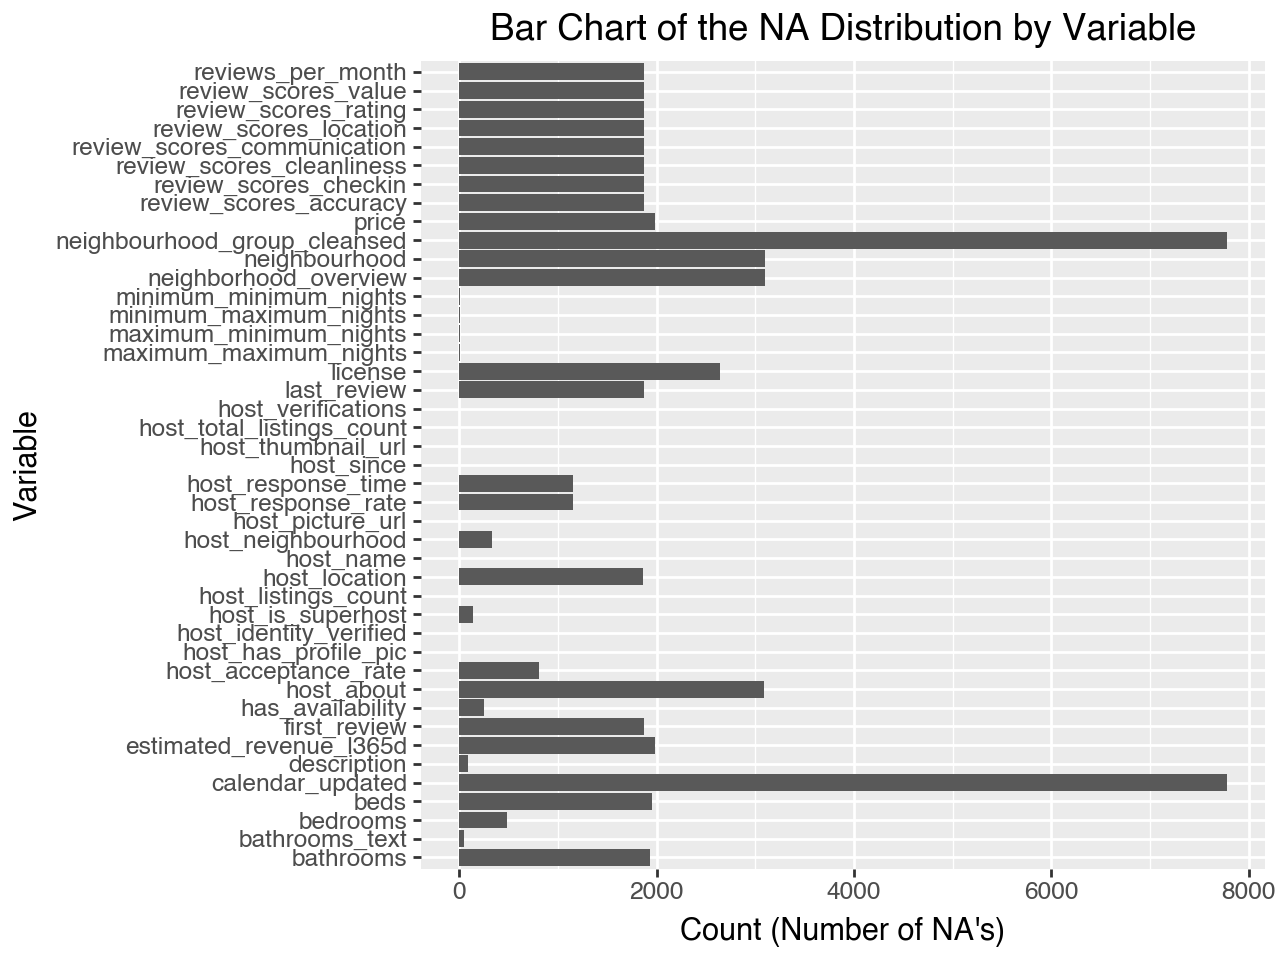

In [7]:
# check for na values

NAs = df.isna().sum().reset_index()
NAs.columns = ["variable", "na_count"]

(
    ggplot(NAs[NAs["na_count"] > 0], mapping = aes(x = "variable", y = "na_count")) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Bar Chart of the NA Distribution by Variable",
        x = "Variable",
        y = "Count (Number of NA's)"
    )
)

### 3. Price Analysis (Target Variable)

In [9]:
# drop NA prices (target column, NAs will be useless)

df = df[df["price"].isna() == False].reset_index(drop = True)

# convert price to a float

df["price"] = df["price"].str.replace("$", "").str.replace(",", "").astype(float)

# create log price column

df["log_price"] = np.log(df["price"])

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 68'. Pick better value with 'binwidth'.


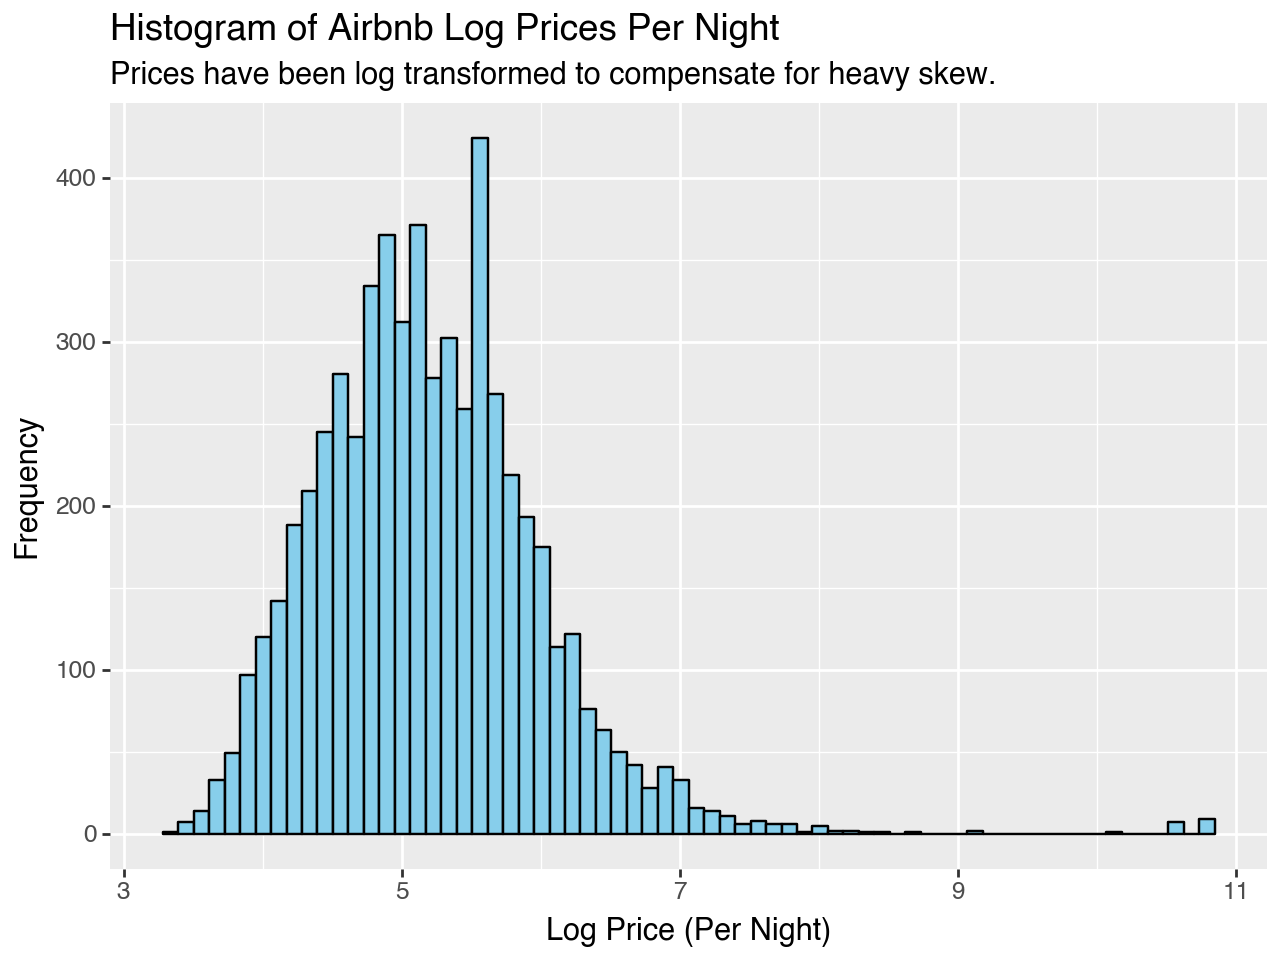

In [10]:
# histogram of log prices (heavy skew in original prices)

(
    ggplot(df, mapping = aes(x = "log_price")) +
    geom_histogram(color = "black", fill = "skyblue") +
    labs(title = "Histogram of Airbnb Log Prices Per Night",
         subtitle = "Prices have been log transformed to compensate for heavy skew.",
         x = "Log Price (Per Night)",
         y = "Frequency")
)

### 4. Feature Distributions

In [12]:
# create feature distributions

### 5. Relationships With Price

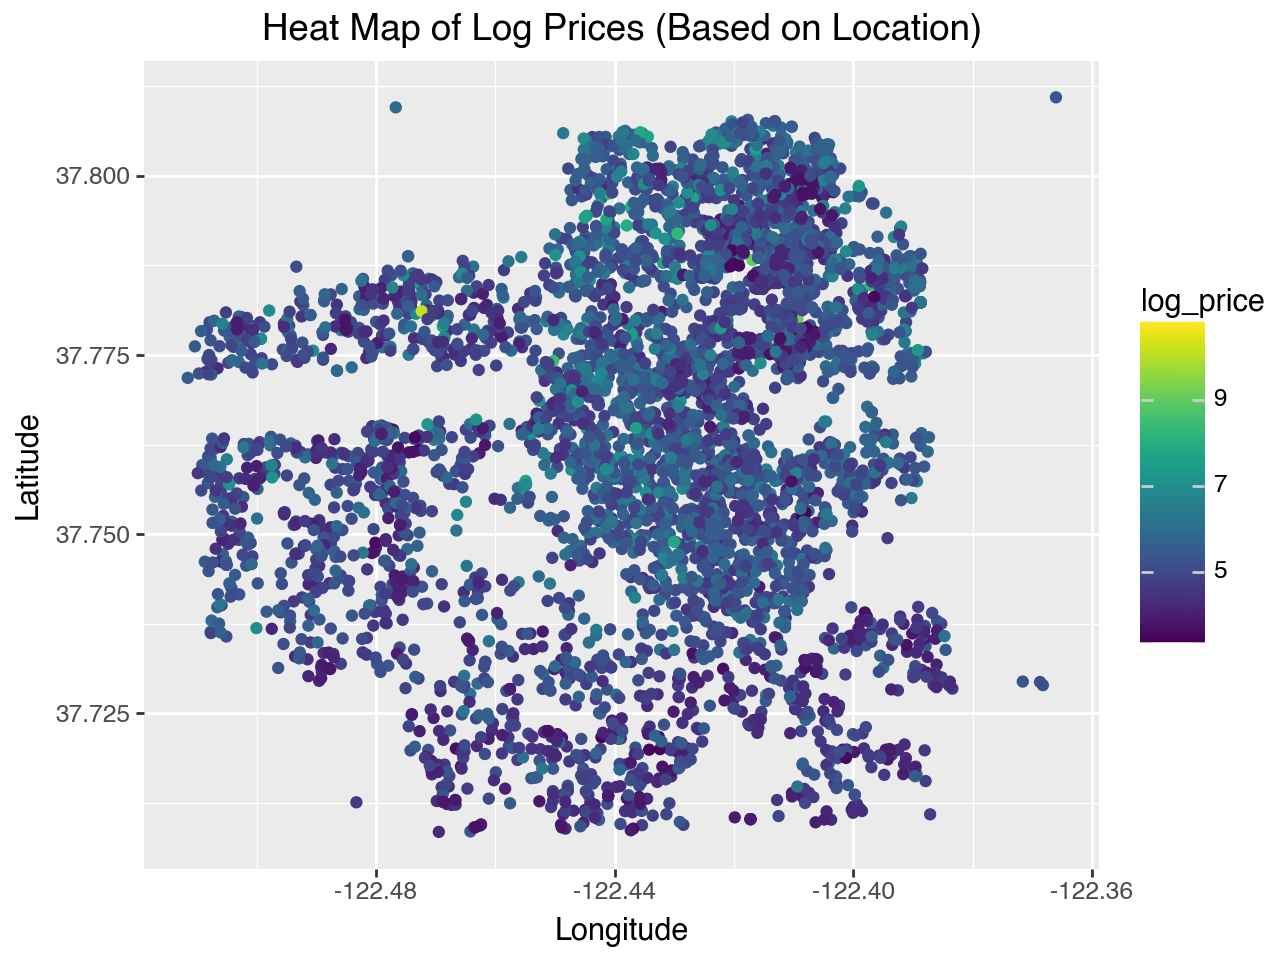

In [14]:
# Examining the relationship between price and location

(
    ggplot(df, mapping = aes(x = "longitude", y = "latitude", color = "log_price")) +
    geom_point() +
    labs(
        title = "Heat Map of Log Prices (Based on Location)",
        x = "Longitude",
        y = "Latitude"
    )
)

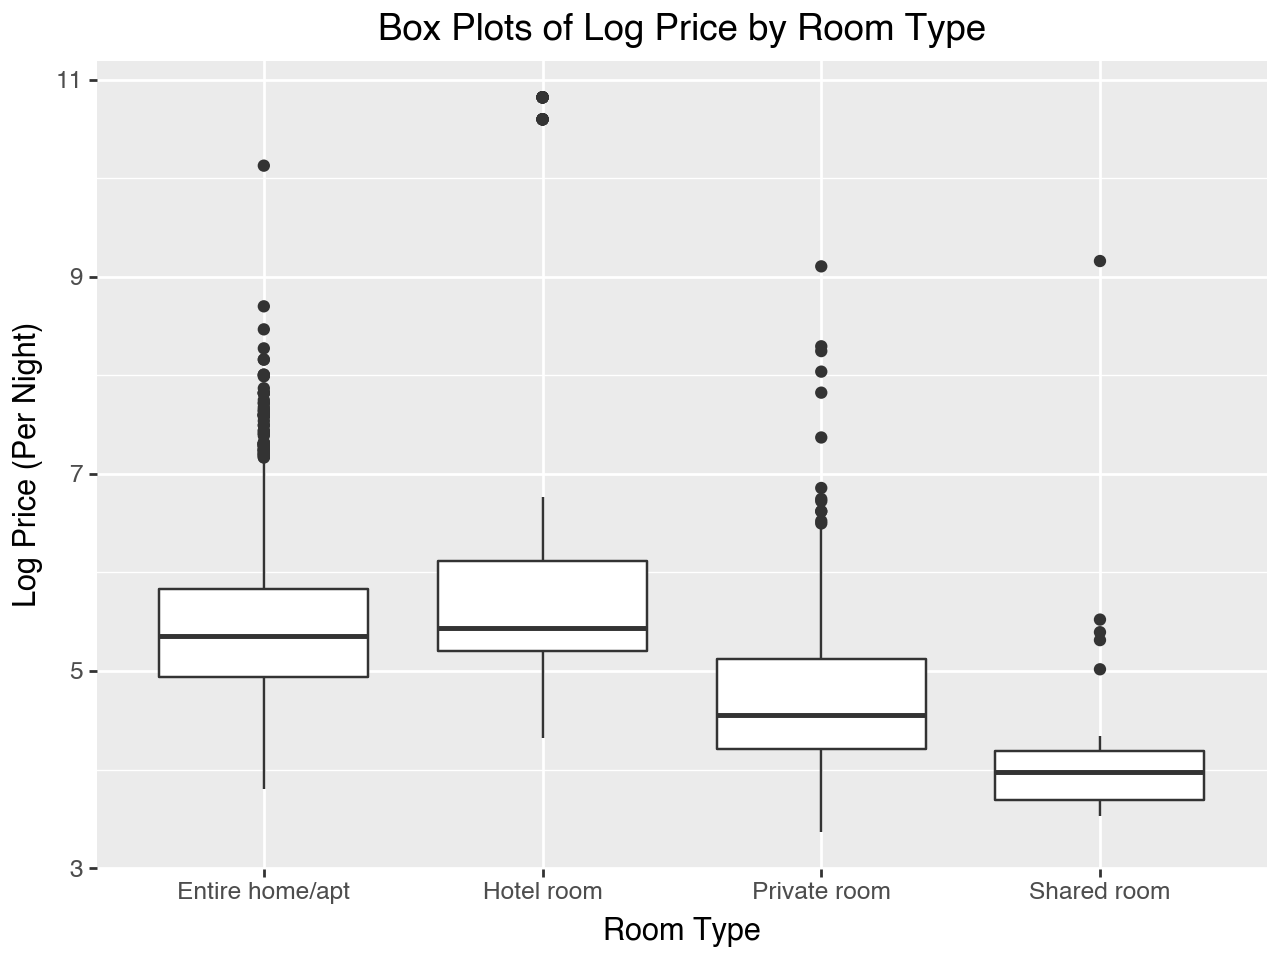

In [15]:
# explore room type and price 

(
    ggplot(df, mapping = aes(x = "room_type", y = "log_price")) +
    geom_boxplot() +
    labs(
        title = "Box Plots of Log Price by Room Type",
        x = "Room Type",
        y = "Log Price (Per Night)"
    )
)

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


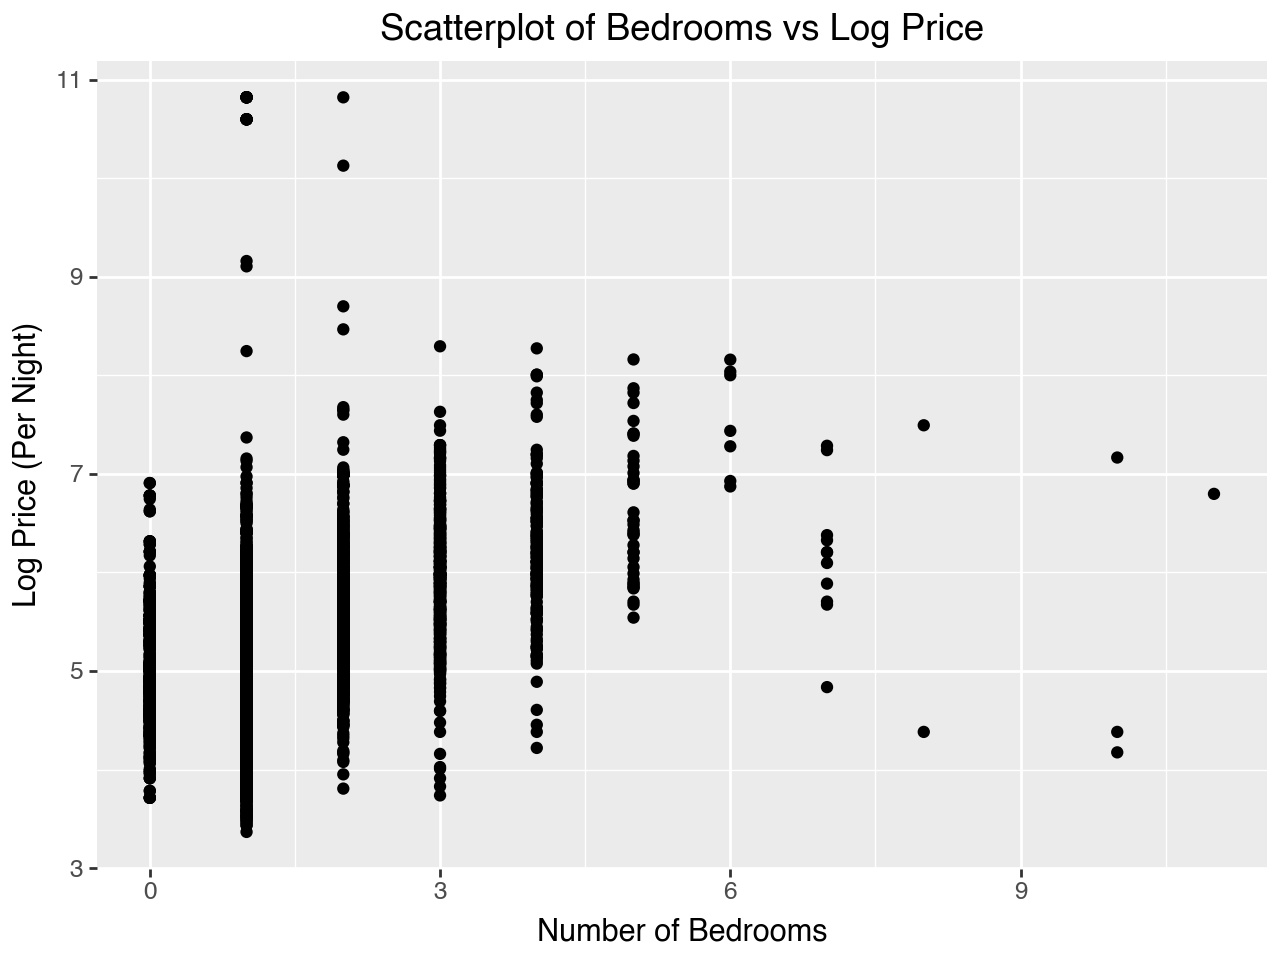

In [16]:
# Exploring relationship between key features and price

(
    ggplot(df, mapping = aes(x = "bedrooms", y = "log_price")) +
    geom_point() +
    labs(
        title = "Scatterplot of Bedrooms vs Log Price",
        x = "Number of Bedrooms",
        y = "Log Price (Per Night)"
    )
)

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


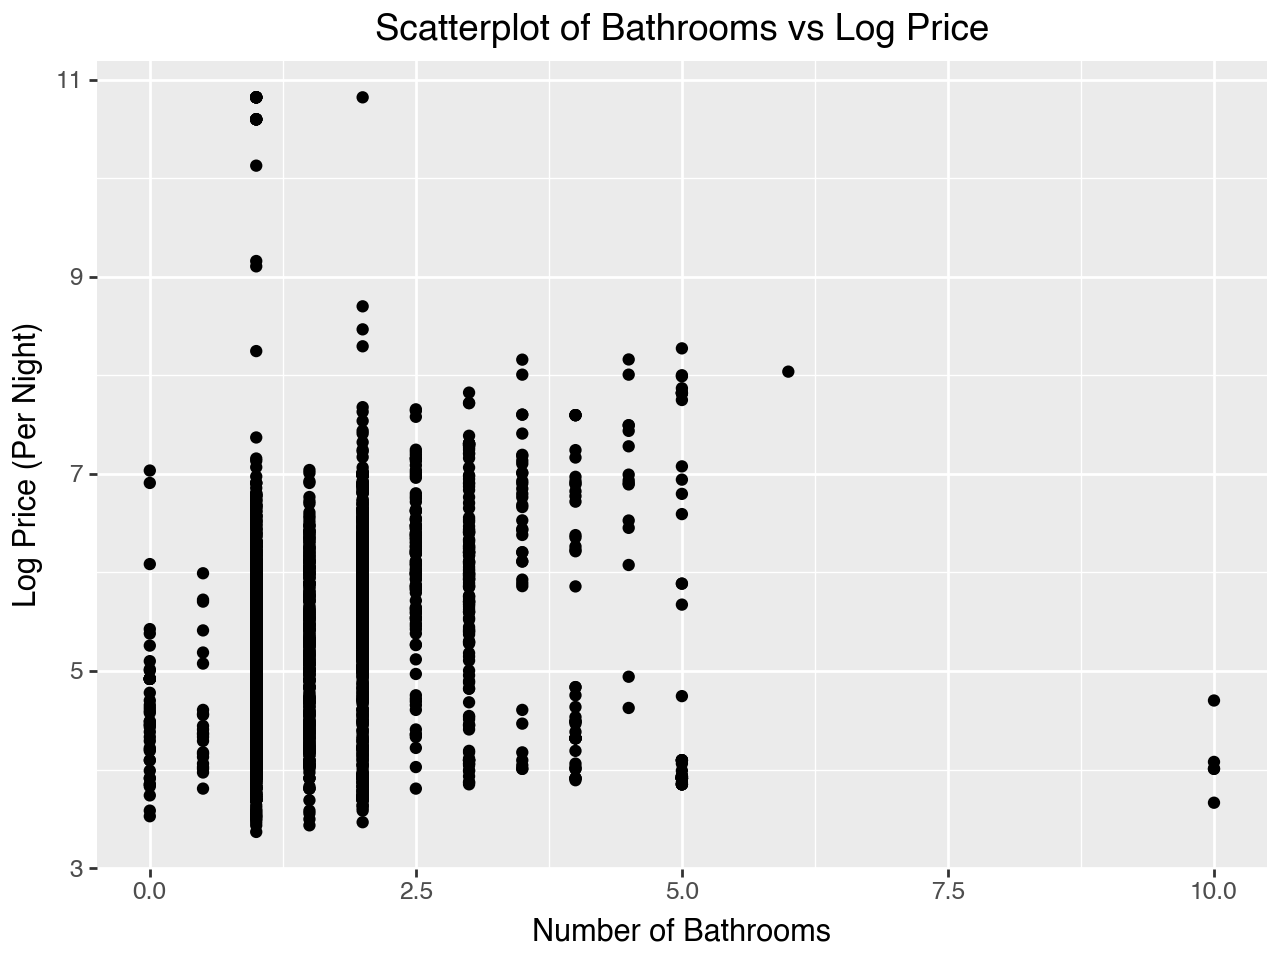

In [17]:
(
    ggplot(df, mapping = aes(x = "bathrooms", y = "log_price")) +
    geom_point() +
    labs(
        title = "Scatterplot of Bathrooms vs Log Price",
        x = "Number of Bathrooms",
        y = "Log Price (Per Night)"
    )
)

### 6. Correlations

In [19]:
# analyze correlations